# IPL  RUN PREDICTION MODEL

Name: AMITHA R

Organization: Entri Elevate

Date: 02/06/2024

## Overview of Problem Statement:
Build a model to predict the second inning run of IPL matches based on historical match data and ball-by-ball delivery data.

## Objective:
Predict the outcome (second inning run) of IPL matches using machine learning techniques.

## Data Description:
Features in matches.csv
id: Unique identifier for each match.
season: Year or season when the match took place.
city: City where the match was played.
date: Date of the match.
team1: Name of the first team playing.
team2: Name of the second team playing.
toss_winner: Team winning the toss.
toss_decision: Decision taken by the toss winner (bat or field).
result: Result of the match (normal, tie, no result, etc.).
dl_applied: Whether Duckworth-Lewis method was applied (1 or 0).
winner: Name of the winning team.
win_by_runs: Runs by which the team batting first won.
win_by_wickets: Number of wickets by which the team batting second won.
player_of_match: Player of the match.
venue: Stadium or venue where the match was held.
umpire1, umpire2: Umpires for the match.
Features in deliveries.csv
match_id: Identifier linking deliveries to matches.
inning: Inning number (1st innings or 2nd innings).
batting_team: Team batting during the delivery.
bowling_team: Team bowling during the delivery.
over: Over number (1 to 20 typically in T20 matches).
ball: Ball number within the over (1 to 6).
batsman: Batsman facing the delivery.
non_striker: Batsman at the non-striker's end.
bowler: Bowler bowling the delivery.
is_super_over: Whether the over was part of a Super Over (1 or 0).
wide_runs: Runs scored due to wide delivery.
bye_runs: Runs scored due to byes.
legbye_runs: Runs scored due to leg byes.
noball_runs: Runs scored due to no-ball.
penalty_runs: Penalty runs awarded.
batsman_runs: Runs scored by the batsman (excluding extras).
extra_runs: Total extra runs (wide, no-ball, etc.).
total_runs: Total runs scored off the delivery (including extras).
player_dismissed: Batsman dismissed on the delivery (if any).
dismissal_kind: Type of dismissal (caught, bowled, run out, etc.).
fielder: Fielder involved in the dismissal.

Data Collection:
Kaggle IPL Matches Dataset


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score



In [2]:
# Load datasets
matches = pd.read_csv('matches.csv')
matches.head()



,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries = pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


## Data Cleaning
Handling Missing Values

In [8]:
# Check for missing values in matches data
print(matches.isnull().sum())

# Check for missing values in deliveries data
print(deliveries.isnull().sum())



id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype:

In [9]:
# Fill missing values 

matches['city'].fillna('Unknown', inplace=True)
matches['winner'].fillna('Unknown', inplace=True)
matches['umpire3'].fillna('Unknown', inplace=True)
matches['umpire1'].fillna('Unknown', inplace=True)
matches['umpire2'].fillna('Unknown', inplace=True)
deliveries['player_dismissed'].fillna('Unknown', inplace=True)
deliveries['dismissal_kind'].fillna('Unknown', inplace=True)
deliveries['fielder'].fillna('Unknown', inplace=True)



## Merge Datasets

In [10]:
# Merge matches and deliveries data
merged_data = pd.merge(matches, deliveries, left_on='id', right_on='match_id', how='inner')


 


In [11]:
merged_data.isnull().sum()

id                    0
Season                0
city                  0
date                  0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
result                0
dl_applied            0
winner                0
win_by_runs           0
win_by_wickets        0
player_of_match     372
venue                 0
umpire1               0
umpire2               0
umpire3               0
match_id              0
inning                0
batting_team          0
bowling_team          0
over                  0
ball                  0
batsman               0
non_striker           0
bowler                0
is_super_over         0
wide_runs             0
bye_runs              0
legbye_runs           0
noball_runs           0
penalty_runs          0
batsman_runs          0
extra_runs            0
total_runs            0
player_dismissed      0
dismissal_kind        0
fielder               0
dtype: int64

In [12]:
merged_data['player_of_match'].fillna('Unknown', inplace=True)

In [13]:
import pandas as pd
from scipy.stats import mstats

# Function to cap outliers using specified quantiles
def cap_outliers(series, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower_bound, upper_bound)

# Assuming merged_data is your DataFrame containing merged matches and deliveries data
# Example: Load and merge data (if not already done)
# merged_data = pd.merge(matches, deliveries, left_on='id', right_on='match_id', how='inner')

# Apply the capping method to each numeric column in the DataFrame
for col in merged_data.select_dtypes(include=["int64", "float64"]).columns:
    merged_data[col] = cap_outliers(merged_data[col])

# Print the first few rows of the modified DataFrame
print(merged_data.head())


     id    Season       city        date                team1  \
0  38.0  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
1  38.0  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
2  38.0  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
3  38.0  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
4  38.0  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied  ... bye_runs  legbye_runs  noball_runs penalty_runs  \
0  normal         0.0  ...      0.0          0.0          0.0       

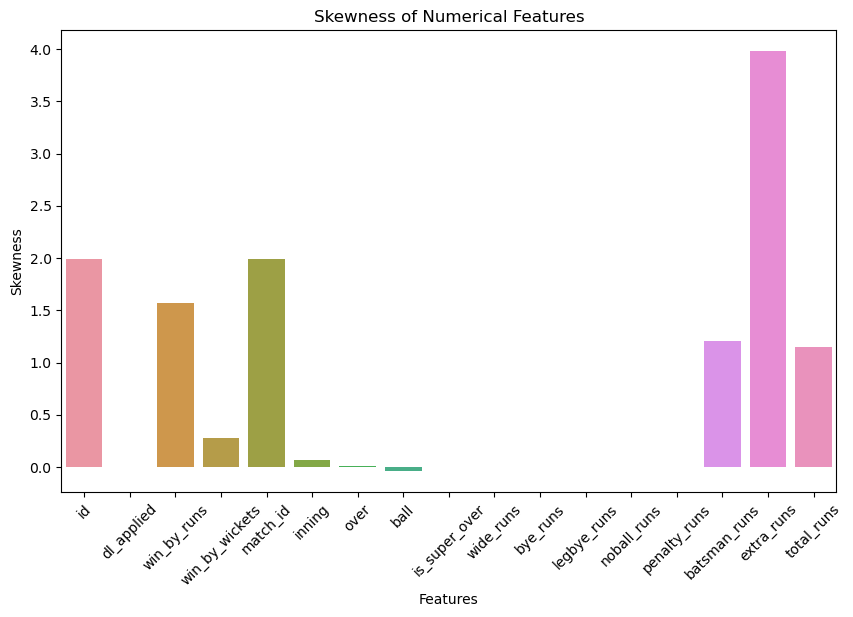

Skewed Features:
Index(['id', 'win_by_runs', 'match_id', 'batsman_runs', 'extra_runs',
       'total_runs'],
      dtype='object')


In [14]:
# Select numerical features
numerical_features =merged_data.select_dtypes(include=[np.number])

# Calculate skewness for each numerical feature
skewness = numerical_features.apply(lambda x: x.skew())

# Visualize skewness
plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.index, y=skewness)
plt.title('Skewness of Numerical Features')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.show()

# Identify features with skewness greater than a threshold (e.g., 0.5)
skewed_features = skewness[skewness > 0.5].index
print("Skewed Features:")
print(skewed_features)


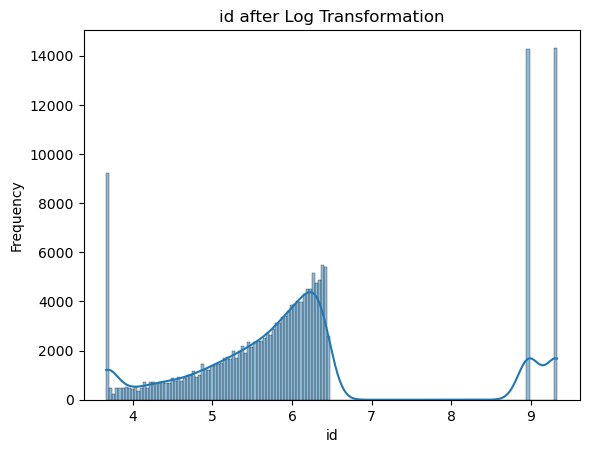

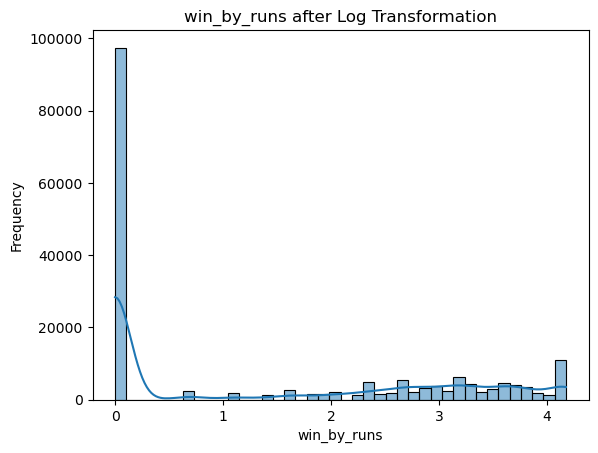

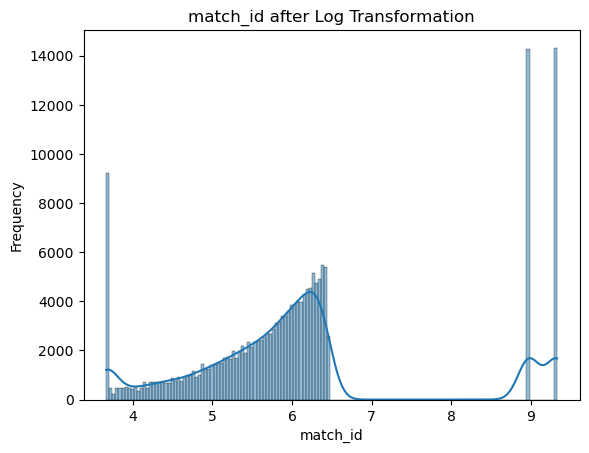

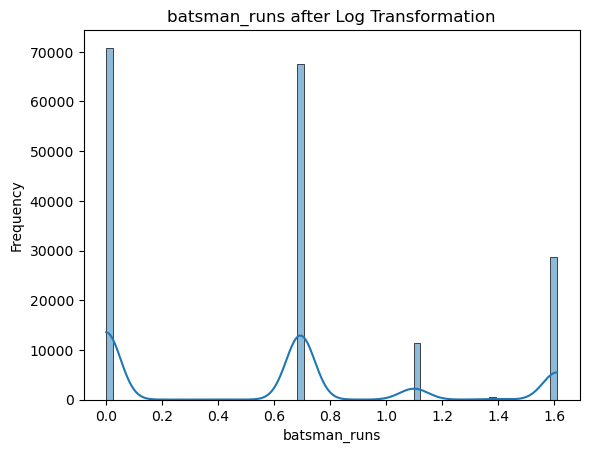

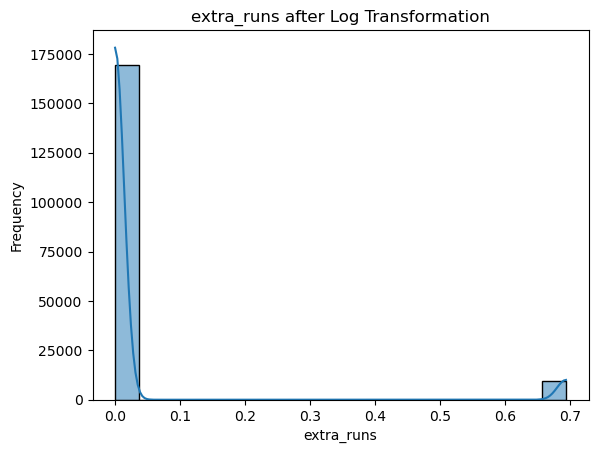

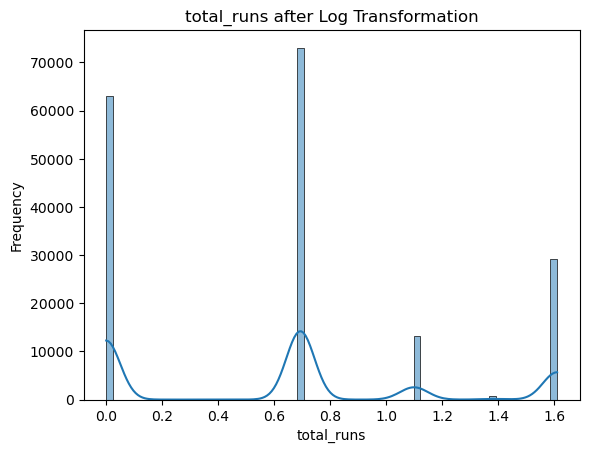

In [15]:
# Apply log transformation to each skewed feature
for feature in skewed_features:
    merged_data[feature] = np.log1p(merged_data[feature])  # Using log1p to handle zero values

# Visualize the transformed distributions (optional)
import seaborn as sns
import matplotlib.pyplot as plt

for feature in skewed_features:
    sns.histplot(merged_data[feature], kde=True)
    plt.title(f'{feature} after Log Transformation')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Exploratory Data Analysis (EDA)

## Number of Matches per Season

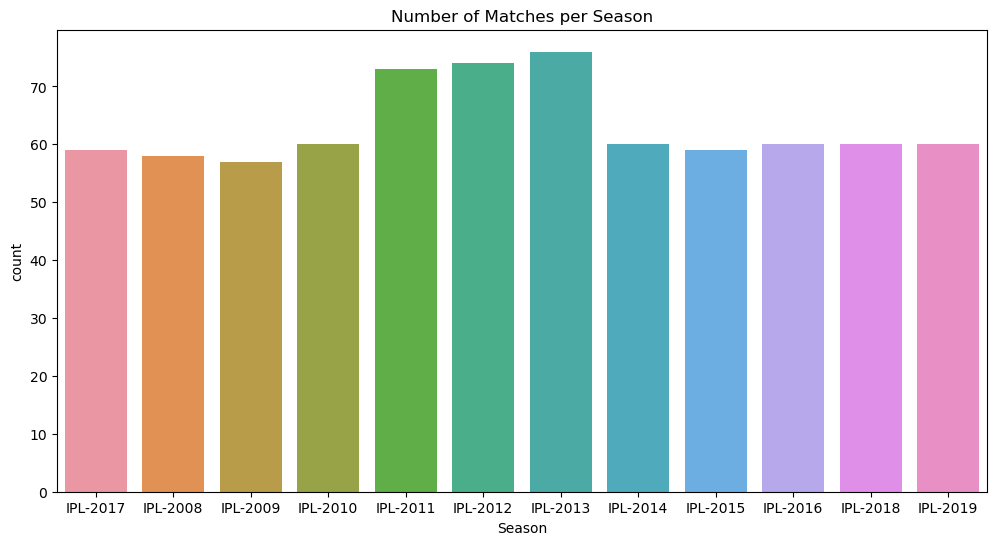

In [16]:
matches['Season'] = matches['Season'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(x='Season', data=matches)
plt.title('Number of Matches per Season')
plt.show()

### Team Performance Over Seasons


## Venue-wise Match Outcomes

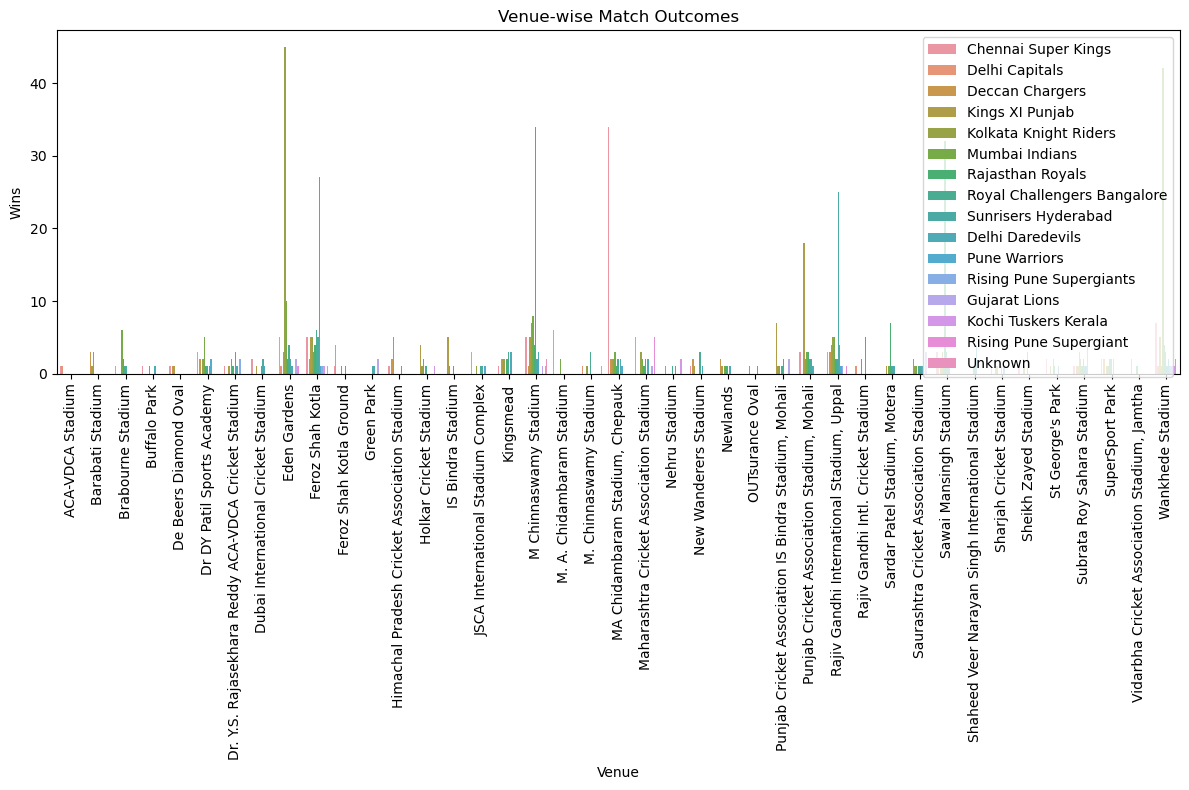

In [17]:
venue_wins = matches.groupby(['venue', 'winner']).size().reset_index(name='wins')
plt.figure(figsize=(12, 8))
sns.barplot(x='venue', y='wins', hue='winner', data=venue_wins)
plt.title('Venue-wise Match Outcomes')
plt.xlabel('Venue')
plt.ylabel('Wins')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## Heatmap of Correlation between Features

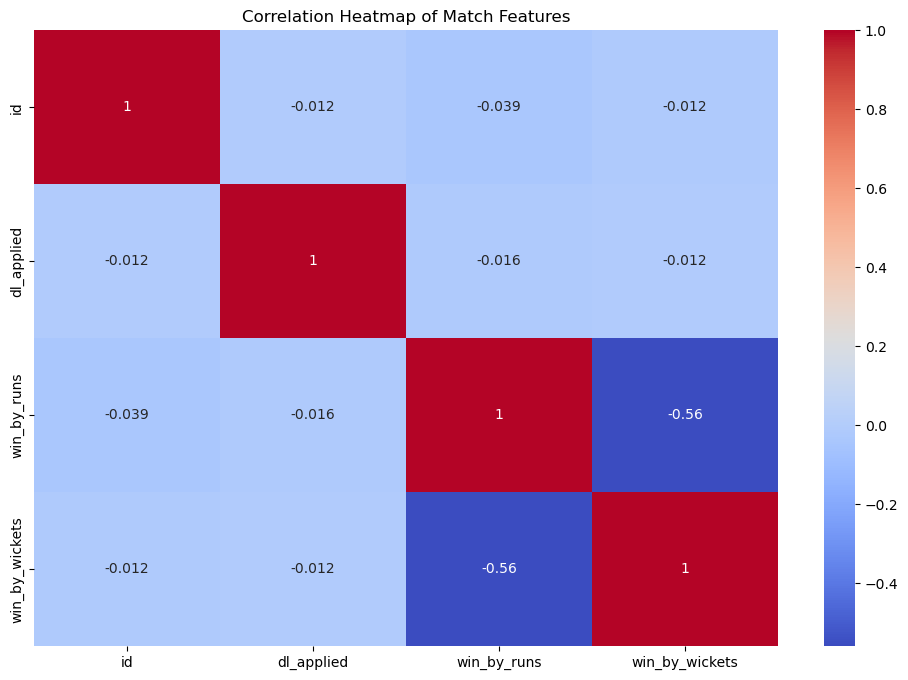

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(matches.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Match Features')
plt.show()

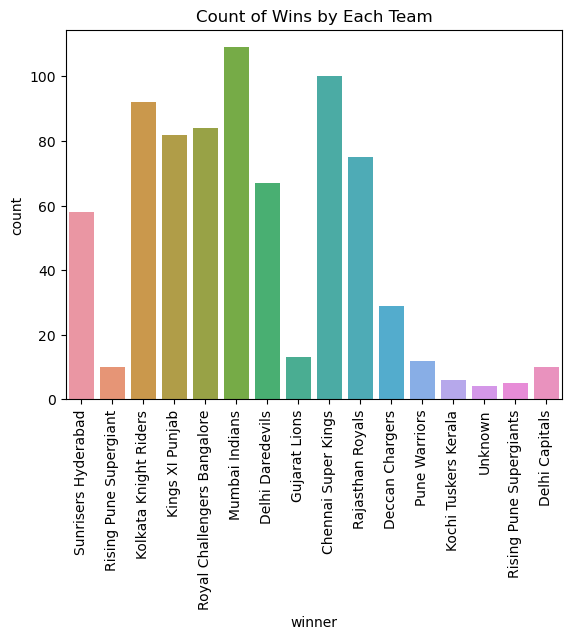

In [19]:
sns.countplot(x='winner', data=matches)
plt.xticks(rotation=90)
plt.title('Count of Wins by Each Team')
plt.show()

## Top Batsmen by Runs

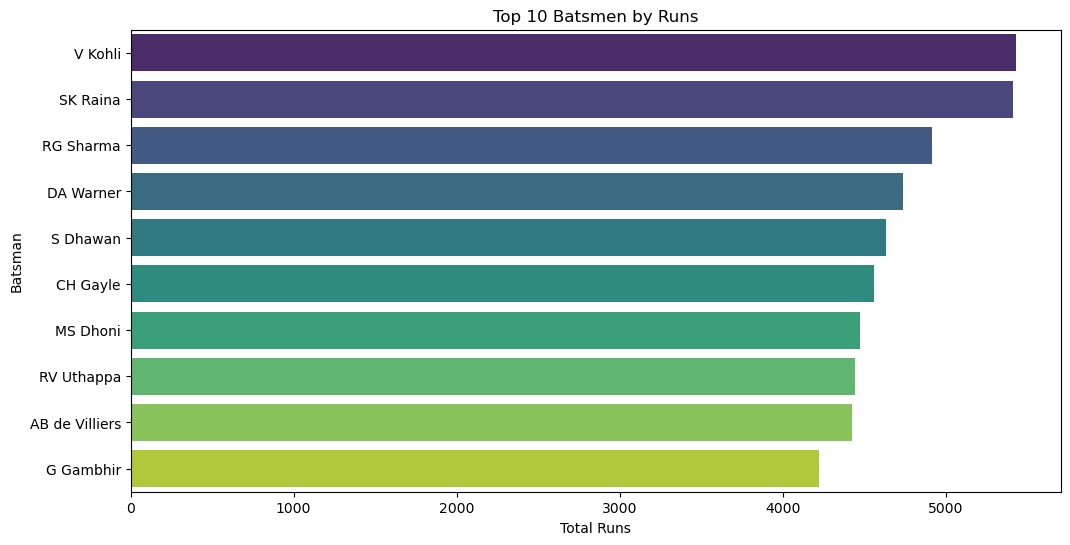

In [20]:
top_batsmen = deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
top_batsmen = top_batsmen.sort_values(by='batsman_runs', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman_runs', y='batsman', data=top_batsmen, palette='viridis')
plt.title('Top 10 Batsmen by Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batsman')
plt.show()

## Top Bowlers by Wickets¶

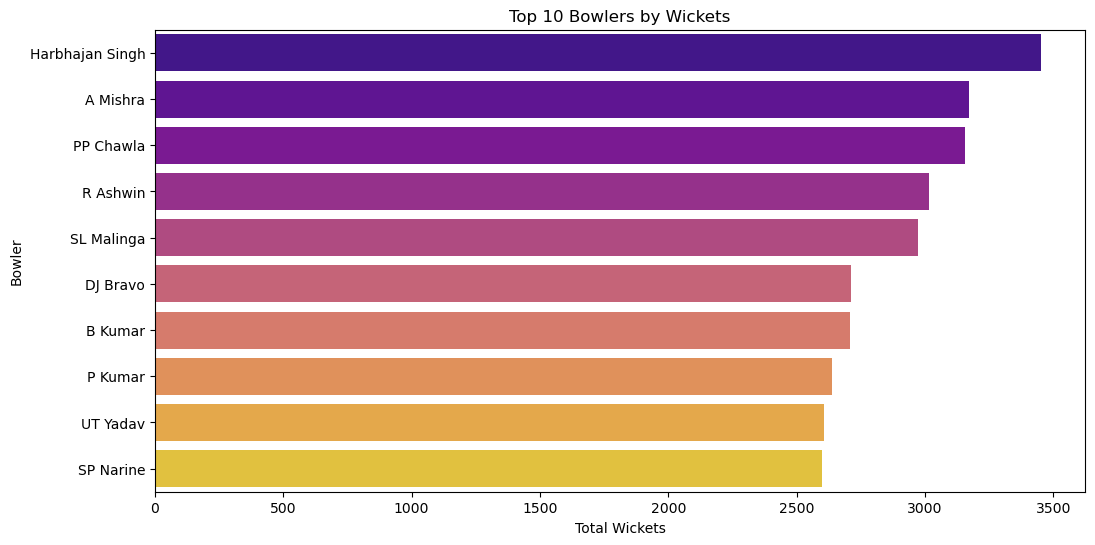

In [21]:
top_bowlers = deliveries[deliveries['dismissal_kind'].notnull()]
top_bowlers = top_bowlers.groupby('bowler').size().reset_index(name='wickets')
top_bowlers = top_bowlers.sort_values(by='wickets', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='wickets', y='bowler', data=top_bowlers, palette='plasma')
plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('Total Wickets')
plt.ylabel('Bowler')
plt.show()

## Matches Played by Teams Each Season

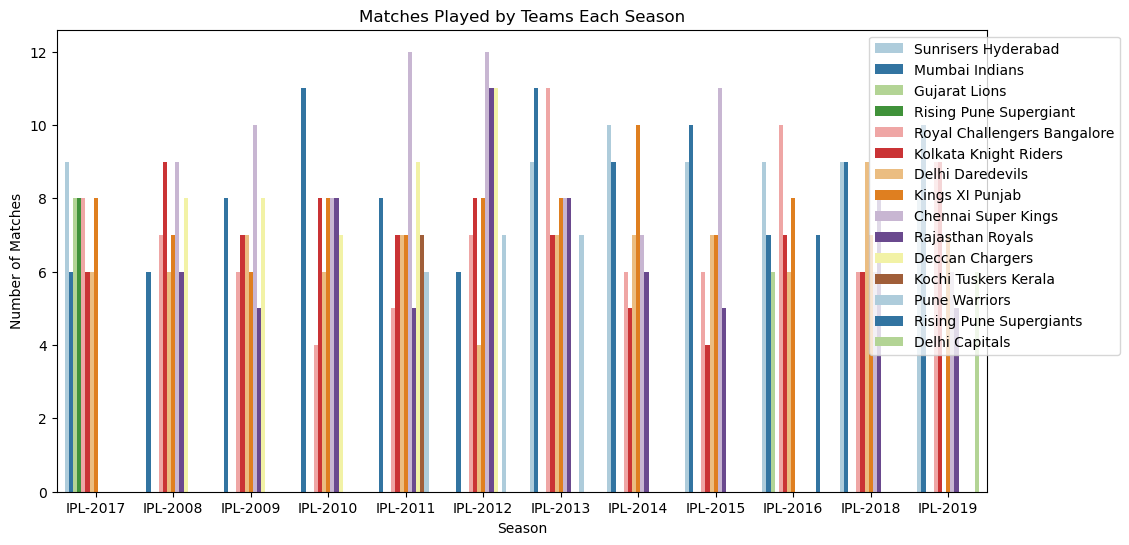

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Season', hue='team1', data=matches, palette='Paired')
plt.title('Matches Played by Teams Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

## Winning Percentage of Teams

Text(0, 0.5, 'Team')

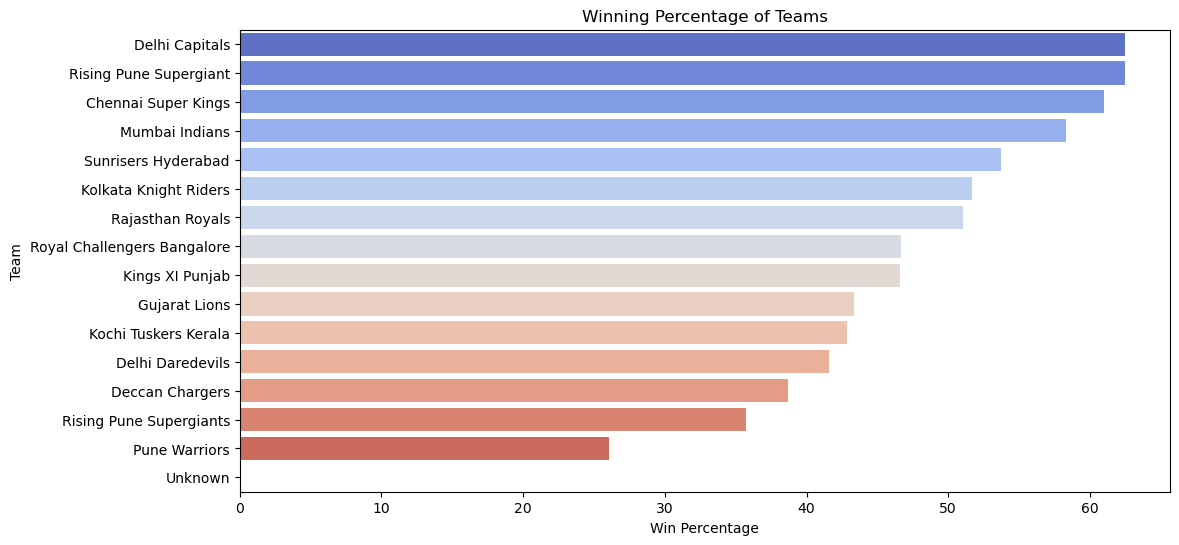

In [23]:
matches_played = matches['team1'].value_counts() + matches['team2'].value_counts()
matches_won = matches['winner'].value_counts()
win_percentage = (matches_won / matches_played) * 100

win_percentage = win_percentage.reset_index()
win_percentage.columns = ['team', 'win_percentage']

plt.figure(figsize=(12, 6))
sns.barplot(x='win_percentage', y='team', data=win_percentage.sort_values(by='win_percentage', ascending=False), palette='coolwarm')
plt.title('Winning Percentage of Teams')
plt.xlabel('Win Percentage')
plt.ylabel('Team')

## Feature Engineering

In [47]:
# Calculate total runs for each match and inning
total_runs = deliveries.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()

# Split innings data
first_innings = total_runs[total_runs['inning'] == 1]
second_innings = total_runs[total_runs['inning'] == 2]

# Merge first and second innings data
match_data = pd.merge(first_innings, second_innings, on='match_id', suffixes=('_1st', '_2nd'))

# Rename columns
match_data.rename(columns={'total_runs_1st': 'first_innings_runs', 'total_runs_2nd': 'second_innings_runs'}, inplace=True)

# Merge with matches dataset to get additional match details
match_data = match_data.merge(matches[['id', 'team1', 'team2', 'venue']], left_on='match_id', right_on='id')

from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the DataFrame
for col in merged_data.columns:
    # Check if the column is categorical
    if match_data[col].dtype == 'object':
        # Apply LabelEncoder to encode the categorical column
        match_data[col] = label_encoder.fit_transform(match_data[col])
# Drop unnecessary columns
match_data.drop(columns=['id'], inplace=True)

# Display the processed match data
match_data.head()


KeyError: 'Season'

## Feature Selection

In [44]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define features and target variable
X = match_data.drop(['second_innings_runs'], axis=1)  # Features
y = match_data['second_innings_runs']

# Apply one-hot encoding to categorical features
X = pd.get_dummies(X, columns=['team1', 'team2', 'venue'])


# Apply SelectKBest with ANOVA F-value scoring
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


C:\Users\Amitha R\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Amitha R\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [45]:
# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['first_innings_runs', 'team2_Kochi Tuskers Kerala',
       'venue_Buffalo Park', 'venue_Holkar Cricket Stadium',
       'venue_Sheikh Zayed Stadium'],
      dtype='object')


##  Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## : Split Data into Training and Testing Sets

In [27]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Building Models

In [28]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# Define models
models = {
    'SVR': SVR(),
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor()
}

# Train models
for name, model in models.items():
    model.fit(X_train, y_train)


## Model Evaluation

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Initialize a list to store the evaluation metrics
evaluation_results = []

# Evaluate models
for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    evaluation_results.append([name, mae, mse, rmse, r2])

# Create a DataFrame for the evaluation results
evaluation_df = pd.DataFrame(evaluation_results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R²'])
print(evaluation_df)


               Model        MAE          MSE       RMSE        R²
0                SVR  24.048242  1032.133722  32.126838  0.073959
1  Linear Regression  18.147917   677.372452  26.026380  0.392254
2      Random Forest  16.271126   626.021866  25.020429  0.438327
3  Gradient Boosting  16.625387   638.555718  25.269660  0.427081
4           AdaBoost  21.474560   773.046818  27.803719  0.306414


## Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid for each model
param_grids = {
    'SVR': {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}
}

# Perform GridSearchCV
best_models = {}
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
    else:
        best_models[name] = model

# Initialize a list to store the evaluation metrics for tuned models
tuned_evaluation_results = []

# Evaluate best models
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    tuned_evaluation_results.append([name + ' (Tuned)', mae, mse, rmse, r2])

# Append tuned results to evaluation DataFrame
tuned_evaluation_df = pd.DataFrame(tuned_evaluation_results, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R²'])
evaluation_df = evaluation_df.append(tuned_evaluation_df, ignore_index=True)
print(evaluation_df)


                       Model        MAE          MSE       RMSE        R²
0                        SVR  24.048242  1032.133722  32.126838  0.073959
1          Linear Regression  18.147917   677.372452  26.026380  0.392254
2              Random Forest  16.271126   626.021866  25.020429  0.438327
3          Gradient Boosting  16.625387   638.555718  25.269660  0.427081
4                   AdaBoost  21.474560   773.046818  27.803719  0.306414
5                SVR (Tuned)  19.428094   776.458039  27.864997  0.303354
6  Linear Regression (Tuned)  18.147917   677.372452  26.026380  0.392254
7      Random Forest (Tuned)  16.797670   656.823928  25.628576  0.410691
8  Gradient Boosting (Tuned)  17.356496   657.338158  25.638607  0.410229
9           AdaBoost (Tuned)  17.433296   661.502763  25.719696  0.406493


C:\Users\Amitha R\AppData\Local\Temp\ipykernel_24172\3140208953.py:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  evaluation_df = evaluation_df.append(tuned_evaluation_df, ignore_index=True)


## Saving the Best Model

In [33]:
import joblib

# Load the saved model
loaded_model = joblib.load('best_model.pkl')

# Identify the best model based on RMSE
best_model_name = evaluation_df.loc[evaluation_df['RMSE'].idxmin(), 'Model']

# Sanitize the model name (remove '(Tuned)' if present)
clean_model_name = best_model_name.replace(' (Tuned)', '')

# Retrieve the best model from the dictionary
best_model = best_models.get(clean_model_name, models.get(clean_model_name))

if best_model is None:
    raise ValueError(f"Model '{clean_model_name}' not found in best_models dictionary.")

print(f"The best model is: {best_model_name} with RMSE: {evaluation_df.loc[evaluation_df['RMSE'].idxmin(), 'RMSE']}")


The best model is: Random Forest with RMSE: 25.020428977640766


## Testing with Unseen Data

In [35]:
# Simulate new data points by adding Gaussian noise to the test set
noise_std = 0.1 * (X_test.max() - X_test.min())  # Adjust the noise level as needed
X_test_noisy = X_test + np.random.normal(0, noise_std, X_test.shape)

# Predict on the noisy test set
y_test_noisy_pred = loaded_model.predict(X_test_noisy)

# Evaluate the loaded model on the noisy test set
noisy_mae = mean_absolute_error(y_test, y_test_noisy_pred)
noisy_mse = mean_squared_error(y_test, y_test_noisy_pred)
noisy_rmse = mean_squared_error(y_test, y_test_noisy_pred, squared=False)
noisy_r2 = r2_score(y_test, y_test_noisy_pred)

print(f"Noisy Test Data - MAE: {noisy_mae}, MSE: {noisy_mse}, RMSE: {noisy_rmse}")

Noisy Test Data - MAE: 38.73084573555948, MSE: 2424.3633837358716, RMSE: 49.23782472587382
